## Problem:-To Predict the amount

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import numpy as np
from scipy.sparse import csr_matrix, csc_matrix, lil_matrix

dense_matrix = np.array([[1, 0, 0, 0],
                         [0, 0, 2, 0],
                         [0, 3, 0, 0]])

sparse_csr = csr_matrix(dense_matrix)

sparse_csc = csc_matrix(dense_matrix)

sparse_lil = lil_matrix((3, 4), dtype=np.int32)
sparse_lil[0, 0] = 1
sparse_lil[1, 2] = 2
sparse_lil[2, 1] = 3

print("CSR format:")
print(sparse_csr)
print("CSC format:")
print(sparse_csc)
print("LIL format:")
print(sparse_lil)

element = sparse_csr[1, 2]
print(f"Element at (1, 2): {element}")

dense_matrix_back = sparse_csr.toarray()
print("Dense matrix from CSR:")
print(dense_matrix_back)

CSR format:
  (0, 0)	1
  (1, 2)	2
  (2, 1)	3
CSC format:
  (0, 0)	1
  (2, 1)	3
  (1, 2)	2
LIL format:
  (0, 0)	1
  (1, 2)	2
  (2, 1)	3
Element at (1, 2): 2
Dense matrix from CSR:
[[1 0 0 0]
 [0 0 2 0]
 [0 3 0 0]]


In [3]:
df=pd.read_csv("TaxiFare.csv")

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [6]:
df.sample()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49858,19:07.0,4.9,2011-06-06 19:19:07 UTC,-73.990013,40.757705,-74.00269,40.760688,2


In [7]:
import pandas as pd

df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

df['hour_of_day'] = df['date_time_of_pickup'].dt.hour
df['day_of_week'] = df['date_time_of_pickup'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['month'] = df['date_time_of_pickup'].dt.month

df.drop(columns=['date_time_of_pickup'], inplace=True)


In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
hour_of_day               int64
day_of_week               int64
is_weekend                int32
month                     int64
dtype: object

In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour_of_day,day_of_week,is_weekend,month
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,13.489080,3.029980,0.282960,6.273300
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,6.506935,1.956936,0.450442,3.461157
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,1.000000,0.000000,3.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,3.000000,0.000000,6.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,5.000000,1.000000,9.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,23.000000,6.000000,1.000000,12.000000


In [11]:
df=df.drop(columns=["unique_id"])

<Axes: xlabel='amount'>

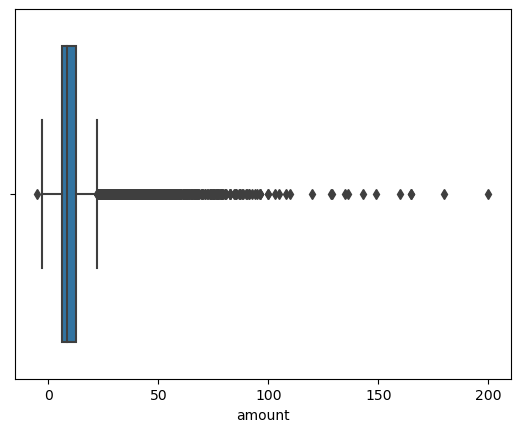

In [12]:
sns.boxplot(x="amount",data=df)

<Axes: xlabel='no_of_passenger'>

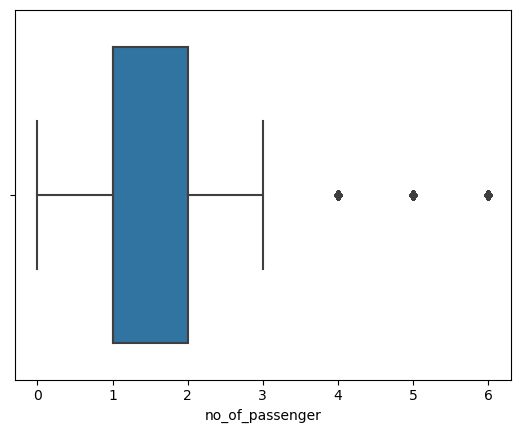

In [13]:
sns.boxplot(x="no_of_passenger",data=df)

<Axes: xlabel='longitude_of_pickup'>

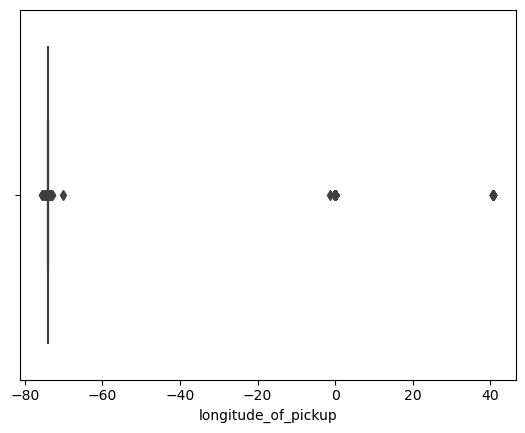

In [14]:
sns.boxplot(x="longitude_of_pickup",data=df)

In [15]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
hour_of_day             0
day_of_week             0
is_weekend              0
month                   0
dtype: int64

In [16]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
hour_of_day               int64
day_of_week               int64
is_weekend                int32
month                     int64
dtype: object

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
correlation_mat=df.corr()

<Axes: >

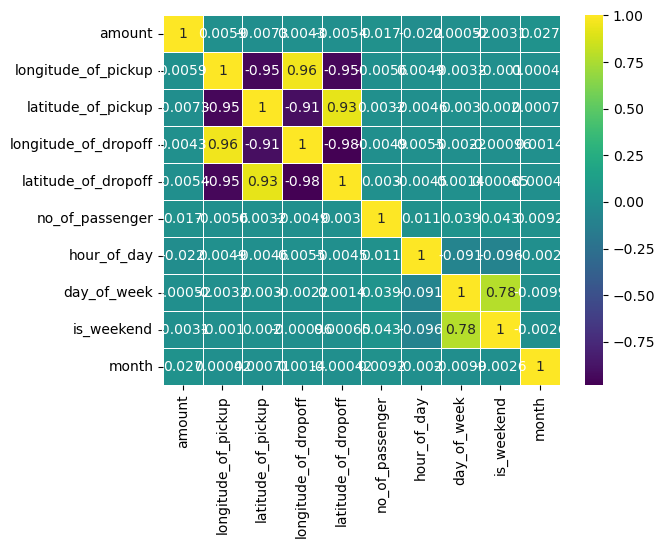

In [19]:
sns.heatmap(correlation_mat,annot=True,linewidth=.5,cmap="viridis")

In [20]:
X=df.drop(["amount"],axis=1)
y=df[["amount"]]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [22]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

lower_percentile = 5 
upper_percentile = 95

def winsorize_columns(df, lower_percentile, upper_percentile):
    for col in df.select_dtypes(include=[np.number]):
        df[col] = winsorize(df[col], limits=(lower_percentile/100, upper_percentile/100))
    return df


df = winsorize_columns(df, lower_percentile, upper_percentile)

In [23]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [24]:
model_1.score(X_train,y_train)

0.0019772717262697137

In [25]:
model_1.score(X_test,y_test)

0.0005717080244981299

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model2=DecisionTreeRegressor(max_depth=8)

In [34]:
model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [35]:
model2.score(X_train,y_train)

0.710206107790119

In [36]:
model2.score(X_test,y_test)

0.5899302024968538

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Only if you're calculating RMSE

y_true = [1.0, 2.0, 3.0, 4.0, 5.0]  
y_pred = [0.9, 2.1, 2.8, 3.9, 5.2]  


mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_true, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error: 0.1400000000000001
Mean Squared Error: 0.022000000000000037
Root Mean Squared Error: 0.1483239697419134
R-squared (R²): 0.989
